In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
### boosting
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
### bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
### xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

# Install catboost if not already installed
%pip install catboost

### catboost
from catboost import CatBoostClassifier, CatBoostRegressor
 


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 541.6 kB/s eta 0:03:09
   ---------------------------------------- 0.5/102.4 MB 541.6 kB/s eta 0:03:09
   ---------------------------------------- 0.8/102.4 MB 550.1 kB/s eta 0:03:05
   ---------------------------------------- 0.8/102.4 MB 550.1 kB/s eta 0:03:05
   ---------------------------------------- 1.0/102.4 MB 637.3 kB/s eta 0:02:40
    --------------------------------------- 1.3/102.4 MB 664.5 kB/s eta 0:02:33
    --------------------------------------- 1.3/102.4 MB 664.5 kB/s eta 0:02:33
    --------------------------------------- 1.3/102.4 MB 664.5 kB/s eta 0:02:33
    --------------------------------------- 1.6/102.4 MB 616.8 kB/s eta 0:0

In [14]:
df= pd.read_csv('data/stud.csv')
x= df.drop(['math_score'], axis=1)
y= df['math_score'] 

In [15]:
### creating column transformer with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()
### creating column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['reading_score', 'writing_score']),
        ('cat', categorical_transformer, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']),
        ('ord', ordinal_transformer, ['test_preparation_course'])
    ])

In [16]:
x =preprocessor.fit_transform(x)

In [17]:
x.shape

(1000, 20)

In [18]:
### train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
def evaluate_model(true, predicted):
    print("Accuracy: ", accuracy_score(true, predicted))
    print("Confusion Matrix:\n", confusion_matrix(true, predicted))
    print("Classification Report:\n", classification_report(true, predicted))

    print("MAE: ", mean_absolute_error(true, predicted))
    print("MSE: ", mean_squared_error(true, predicted))
    print("RMSE: ", root_mean_squared_error(true, predicted, squared=False))
    print("R2 Score: ", r2_score(true, predicted))
    

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

Model: Linear Regression
R2 Score: 0.8804332983749564

Model: Ridge Regression
R2 Score: 0.8805994342975214

Model: Lasso Regression
R2 Score: 0.825320079562973

Model: ElasticNet Regression
R2 Score: 0.7396263250512182

Model: Random Forest Regressor
R2 Score: 0.8499438039669128

Model: XGBoost Regressor
R2 Score: 0.8212205171585083

Model: CatBoost Regressor
R2 Score: 0.8514542895149364



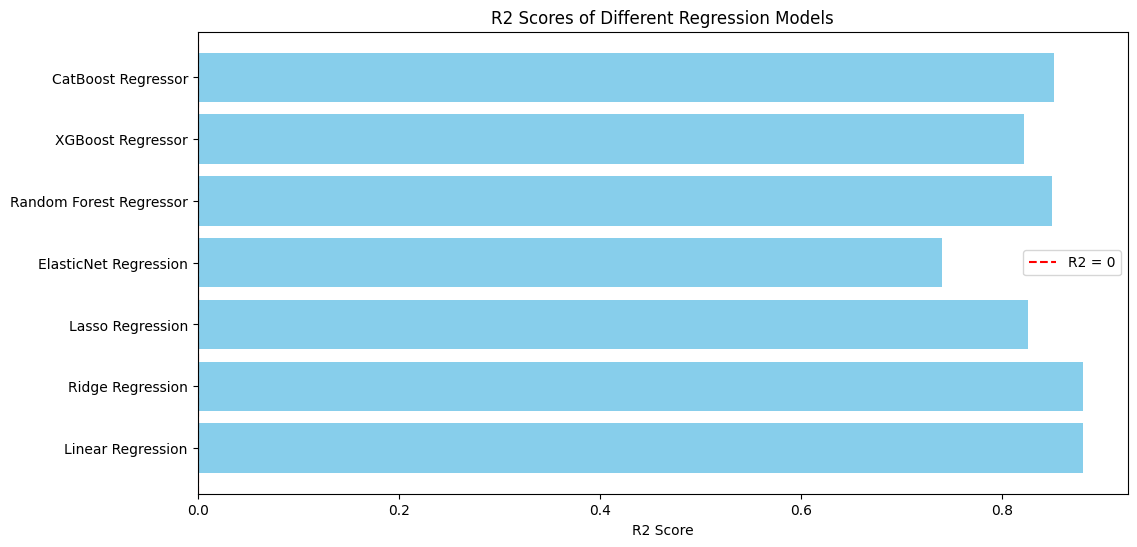

In [23]:
# Only use regression models for regression tasks
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0)
}

model_list = []
r2_list = []

for name, model in regression_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"Model: {name}")
    
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}\n")
    
    model_list.append(name)
    r2_list.append(r2)

# Plotting R2 Scores
plt.figure(figsize=(12, 6))
plt.barh(model_list, r2_list, color='skyblue')
plt.xlabel('R2 Score')
plt.title('R2 Scores of Different Regression Models')
plt.axvline(x=0, color='red', linestyle='--', label='R2 = 0')
plt.legend()    
plt.show()